## Importing libraries

In [25]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

## Reading the file

In [26]:
df = pd.read_csv("/content/drive/MyDrive/Language Detection.csv")

In [27]:
df.head(5)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [28]:
df['Language'].value_counts() # value count for each language



English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [29]:
# separating the independent and dependant features
X = df['Text']
y = df['Language']

In [30]:
# converting categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## Text Preprocessing

In [31]:
df_list=[]
for text in X:
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    df_list.append(text)

In [32]:
# creating bag of words using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
countvect = CountVectorizer()
X = countvect.fit_transform(df_list).toarray()
print(X.shape)
len(df_list)

(10337, 34937)


10337

## Train Test split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.20, random_state=41)

## Model creation and Prediction

##### 1. Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
y_pred = lg.fit(X_train, y_train).predict(X_test)

#### Evaluating the Logistic Regression Model

In [45]:
from sklearn.metrics import f1_score
f1score_lg = f1_score(y_test, y_pred, average = 'macro')
print("F1 Score Logistic Regression: ", f1score_lg)

F1 Score Logistic Regression:  0.9433869318996173


#### 2. Naive Bayes

In [36]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
y_pred1 = nb.fit(X_train, y_train).predict(X_test)

In [43]:
from sklearn.metrics import f1_score
f1score_nb = f1_score(y_test, y_pred1, average = 'macro')
print("F1 Score Naive Bayes: ", f1score_nb)

F1 Score Naive Bayes:  0.9781848970998427


#### 3. Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
y_pred2 = dt.fit(X_train, y_train).predict(X_test)

In [48]:
from sklearn.metrics import f1_score
f1score_dt = f1_score(y_test, y_pred2, average = 'macro')
print("F1 Score Decison Tree Classifier: ", f1score_dt)

F1 Score Decison Tree Classifier:  0.857566977531408



#### 4. Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = rf = RandomForestClassifier()
y_pred3 = rf.fit(X_train, y_train).predict(X_test)

In [52]:
from sklearn.metrics import f1_score
f1score_dt = f1_score(y_test, y_pred3, average = 'macro')
print("F1 Score Random Forest: ", f1score_dt)

F1 Score Random Forest:  0.9224580982215524


#### 5. Support Vector Machines (SVM)

In [53]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
y_pred4 = svm_classifier.fit(X_train, y_train).predict(X_test)

In [54]:
from sklearn.metrics import f1_score
F1score_svm= f1_score(y_test, y_pred4, average='macro')
print("F1 Score SVM: ", F1score_svm)

F1 Score SVM:  0.9277814233646131


# Plotting the F1 Scores of Different Models

In [69]:
f1_scores= {
   "F1 Score Logistic Regression" :  94.33,
    "F1 Score Naive Bayes":  97.81,
    "F1 Score Decison Tree Classifier" :  85.75,
    "F1 Score Random Forest":  92.24,
    "F1 Score SVM":  92.77
}

In [70]:
model_names = list(f1_scores.keys())
scores = list(f1_scores.values())

([0, 1, 2, 3, 4],
 [Text(0, 0, 'F1 Score Logistic Regression'),
  Text(1, 0, 'F1 Score Naive Bayes'),
  Text(2, 0, 'F1 Score Decison Tree Classifier'),
  Text(3, 0, 'F1 Score Random Forest'),
  Text(4, 0, 'F1 Score SVM')])

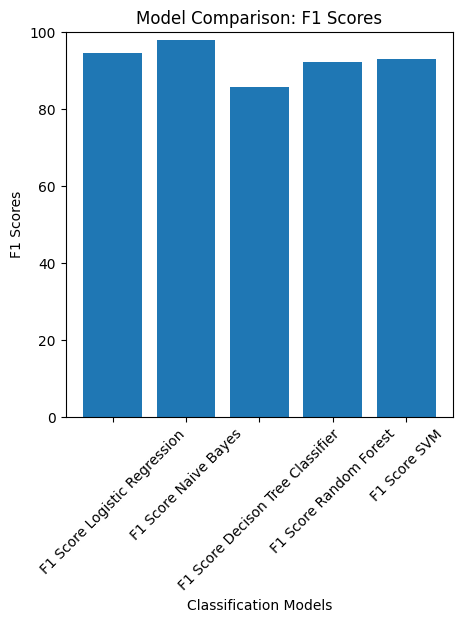

In [72]:
plt.figure(figsize=(5, 5))
plt.bar(model_names, scores)
plt.xlabel('Classification Models')
plt.ylabel('F1 Scores')
plt.title('Model Comparison: F1 Scores')
plt.ylim(0, 100)
plt.xticks(rotation=45)

### **Conclusion:** The results of the evaluation using F1 score as the metric shows that Multinomial Naive Bayes is performing better compared to other models, with a score of 97.81%

# Function to Detect the Language

In [62]:
def prediction(text):
  b = countvect.transform([text]).toarray()
  language = nb.predict(b)
  language = le.inverse_transform(language)
  print("The Language is in", language[0])

In [63]:
prediction("Innomatics Research labs provides a community based knowledge portal for full stack and Data Science professionals")

The Language is in English


In [64]:
prediction("Innomatics Research labs  fournit un portail de connaissances basé sur la communauté pour les professionnels de l'analyse et de la science des données"
)

The Language is in French


In [65]:
prediction("توفر Innomatics Research labs  بوابة معرفية قائمة على المجتمع لمحترفي التحليلات وعلوم البيانات")

The Language is in Arabic


In [66]:
prediction("Innomatics Research labs  proporciona un portal de conocimiento basado en la comunidad para profesionales de Analytics y Data Science.")

The Language is in Spanish


In [67]:
prediction('അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു')

The Language is in Malayalam


In [68]:
prediction("Innomatics Research labs  - это портал знаний на базе сообщества для профессионалов в области аналитики и данных.")

The Language is in Russian
